In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [223]:
data_path = 'healthcare-dataset-stroke-data (2).csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [224]:
df_edit = df.drop(columns=['id'])
print(len(df_edit))
print(df_edit.shape)
df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)



5110
(5110, 11)


C:\Users\ahmed\AppData\Local\Temp\ipykernel_9736\346148576.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)


# **Data Visualization, Preprocessing, and Cleaning**

In [225]:
df_encoded = pd.get_dummies(df_edit,columns=['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], drop_first=False).astype(np.float64)
df_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [226]:
from imblearn.combine import SMOTETomek

# Instantiate SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy=0.82, random_state=42)

# Separate features and target
X = df_encoded.drop(columns=['stroke'])  # Features
y = df_encoded['stroke']  # Target variable

# Apply SMOTETomek
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Combine resampled features and target into one DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
print("Original dataset shape:", df_encoded.shape)
print("Resampled dataset shape:", df_resampled.shape)

Original dataset shape: (5110, 22)
Resampled dataset shape: (8771, 22)


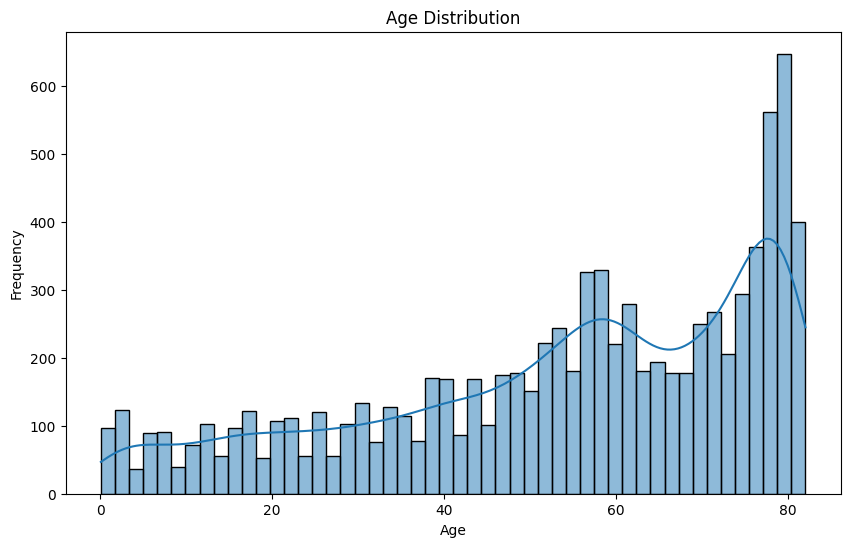

In [227]:

plt.figure(figsize=(10, 6))
sns.histplot(df_resampled['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [228]:
# count nulls
df_resampled.isnull().sum()
df_resampled.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0.0,1.0,228.69,36.600000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,80.0,0.0,1.0,105.92,32.500000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [229]:
df_resampled.describe(percentiles=[.25, .5, .75,.9, .88, .99])

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,...,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,53.913306,0.168941,0.112435,117.318630,29.343151,0.567343,0.432543,0.000114,0.245267,0.754733,...,0.585023,0.203080,0.079678,0.478267,0.521733,0.257849,0.221697,0.362968,0.157486,0.450120
std,22.603117,0.338023,0.281625,54.043072,6.714096,0.461217,0.461200,0.010678,0.415092,0.415092,...,0.460425,0.370526,0.270336,0.463993,0.463993,0.412578,0.378538,0.451071,0.339629,0.497534
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,78.290000,25.325196,0.000000,0.000000,0.000000,0.000000,0.560781,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.355544,0.000000,0.000000,96.190000,28.893237,0.851940,0.147788,0.000000,0.000000,1.000000,...,0.969979,0.000000,0.000000,0.394588,0.605412,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,0.000000,0.000000,138.790001,32.400000,1.000000,1.000000,0.000000,0.439219,1.000000,...,1.000000,0.178605,0.000000,1.000000,1.000000,0.555123,0.322791,1.000000,0.000000,1.000000
88%,78.698831,0.801130,0.432893,206.840342,36.811186,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860675,1.000000
90%,79.000000,0.922367,0.586321,212.190000,37.700000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,81.738985,1.000000,1.000000,247.882385,49.800000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
# Define thresholds for outliers
bmi_mean, bmi_std = 29.3, 6.7
glucose_mean, glucose_std = 116, 40

bmi_lower, bmi_upper = bmi_mean - 3 * bmi_std, bmi_mean + 3 * bmi_std
glucose_lower, glucose_upper = glucose_mean - 3 * glucose_std, glucose_mean + 3 * glucose_std

print(f"BMI Outlier Range: Below {bmi_lower:.2f} or Above {bmi_upper:.2f}")
print(f"Glucose Outlier Range: Below {glucose_lower:.2f} or Above {glucose_upper:.2f}")

# Identify outliers for BMI and glucose levels
bmi_outliers = df_resampled[(df_resampled['bmi'] <= bmi_lower) | (df_resampled['bmi'] >= bmi_upper)]
glucose_outliers = df_resampled[(df_resampled['avg_glucose_level'] < glucose_lower) | (df_resampled['avg_glucose_level'] > glucose_upper)]

# Count total outliers and stroke cases among them
bmi_stroke_cases = bmi_outliers[bmi_outliers['stroke'] > 0].shape[0]
glucose_stroke_cases = glucose_outliers[glucose_outliers['stroke'] > 0].shape[0]

print(f"Total BMI Outliers: {bmi_outliers.shape[0]}, Stroke Cases: {bmi_stroke_cases}")
print(f"Total Glucose Outliers: {glucose_outliers.shape[0]}, Stroke Cases: {glucose_stroke_cases}")

df_cleaned_bmi = df_resampled[(df_resampled['bmi'] >= bmi_lower) & (df_resampled['bmi'] <= bmi_upper)]
df_cleaned = df_cleaned_bmi[(df_cleaned_bmi['avg_glucose_level'] >= glucose_lower) & (df_cleaned_bmi['avg_glucose_level'] <= glucose_upper)]

print()
print(len(df_resampled), "length of resampled dataset")
print("removing ", len(df_resampled) - len(df_cleaned), " outliers..")
print(len(df_cleaned), " remaining after removing outliers")
print(len(df_resampled[df_resampled['stroke'] == 1]), "in resampled dataset")
print(len(df_cleaned[df_cleaned['stroke'] == 1]), "stroke cases reamining..")

BMI Outlier Range: Below 9.20 or Above 49.40
Glucose Outlier Range: Below -4.00 or Above 236.00
Total BMI Outliers: 94, Stroke Cases: 11
Total Glucose Outliers: 259, Stroke Cases: 198

8771 length of resampled dataset
removing  352  outliers..
8419  remaining after removing outliers
3948 in resampled dataset
3739 stroke cases reamining..


In [231]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8419 entries, 0 to 8769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             8419 non-null   float64
 1   hypertension                    8419 non-null   float64
 2   heart_disease                   8419 non-null   float64
 3   avg_glucose_level               8419 non-null   float64
 4   bmi                             8419 non-null   float64
 5   gender_Female                   8419 non-null   float64
 6   gender_Male                     8419 non-null   float64
 7   gender_Other                    8419 non-null   float64
 8   ever_married_No                 8419 non-null   float64
 9   ever_married_Yes                8419 non-null   float64
 10  work_type_Govt_job              8419 non-null   float64
 11  work_type_Never_worked          8419 non-null   float64
 12  work_type_Private               8419 no

Correlation between BMI and Stroke: 0.12


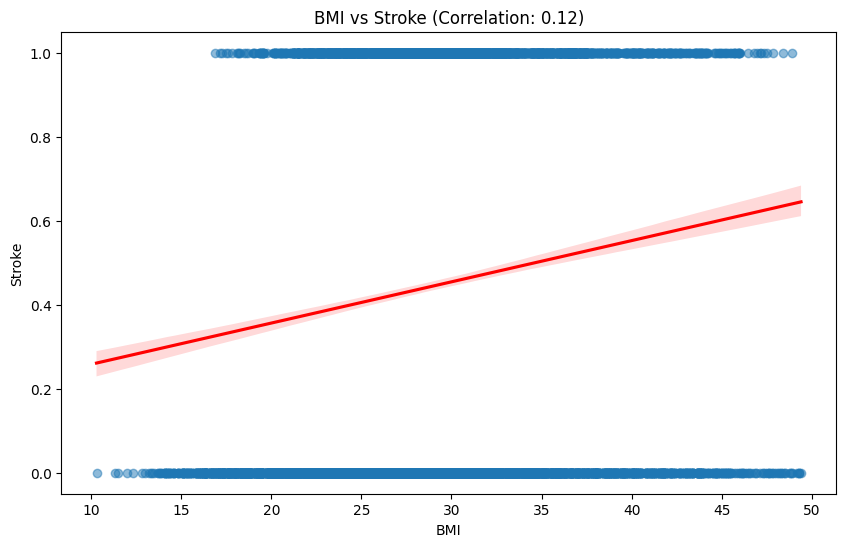

In [232]:
# Calculate the correlation coefficient
correlation = df_cleaned[['bmi', 'stroke']].corr().iloc[0, 1]
print(f"Correlation between BMI and Stroke: {correlation:.2f}")

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='stroke', data=df_cleaned, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'BMI vs Stroke (Correlation: {correlation:.2f})')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

In [233]:
correlation_matrix = df_cleaned.corr()
print(correlation_matrix['stroke'].sort_values(ascending=False))
print()
print(correlation_matrix['age'].sort_values(ascending=False))
print()

stroke                            1.000000
age                               0.586693
ever_married_Yes                  0.294766
hypertension                      0.252639
heart_disease                     0.248158
avg_glucose_level                 0.240429
smoking_status_formerly smoked    0.159246
work_type_Self-employed           0.157985
bmi                               0.120508
Residence_type_Urban              0.039838
gender_Male                       0.026652
work_type_Private                 0.021336
work_type_Govt_job                0.013041
smoking_status_smokes             0.008820
gender_Other                     -0.009742
smoking_status_never smoked      -0.024069
gender_Female                    -0.026420
Residence_type_Rural             -0.039838
work_type_Never_worked           -0.045751
smoking_status_Unknown           -0.125794
work_type_children               -0.255639
ever_married_No                  -0.294766
Name: stroke, dtype: float64

age                     

Typically, features with stroke correlation below 0.1 are unwanted and may be removed, and those otherwise are kept, but we need to do further inspection before we remove them.

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


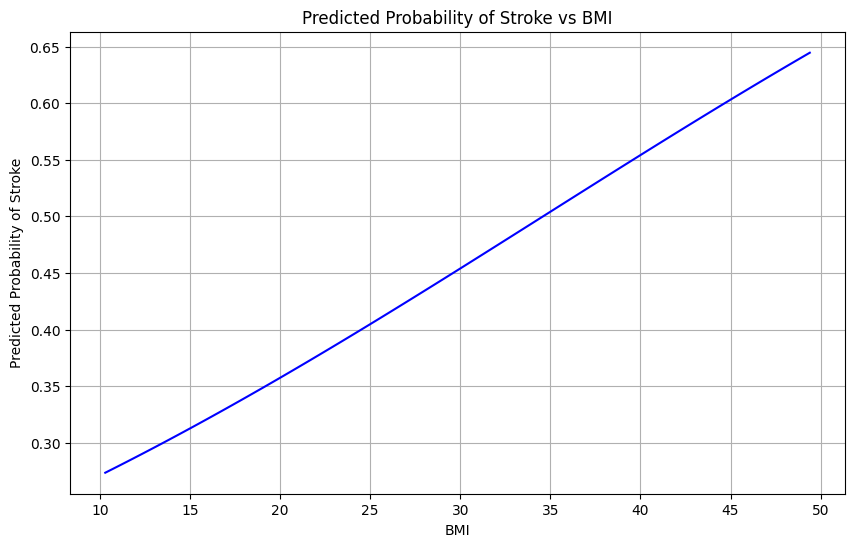

In [234]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_cleaned[['bmi']], df_cleaned['stroke'])
# Predict the probability of stroke for a range of BMI values
bmi_values = np.linspace(df_cleaned['bmi'].min(), df_cleaned['bmi'].max(), 100).reshape(-1, 1)
predicted_probabilities = model.predict_proba(bmi_values)[:, 1]
# Plot the predicted probabilities against BMI values
plt.figure(figsize=(10, 6))
plt.plot(bmi_values, predicted_probabilities, color='blue')
plt.title('Predicted Probability of Stroke vs BMI')
plt.xlabel('BMI')
plt.ylabel('Predicted Probability of Stroke')
plt.grid()
plt.show()


Correlation matrix showed that BMI is weakly correlated with strokes, but the logistic regression model tells a completely different story.

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


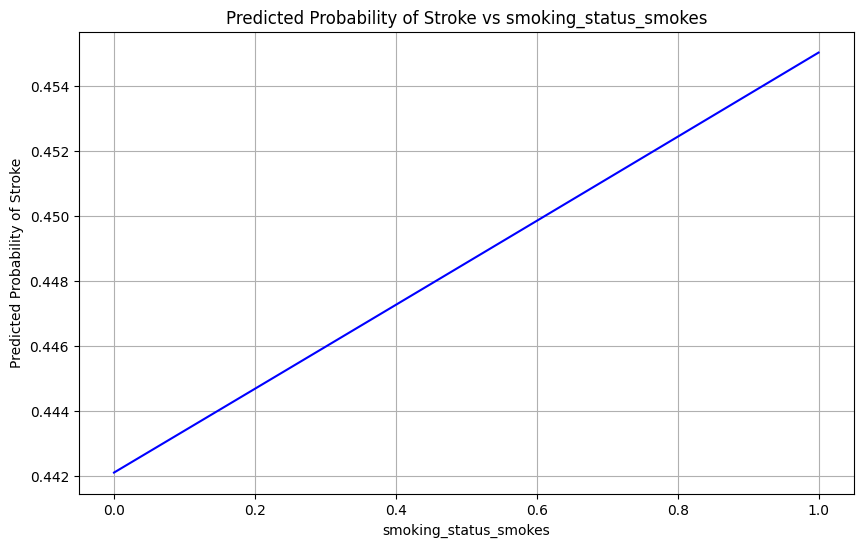

In [235]:
model = LogisticRegression()
model.fit(df_cleaned[['smoking_status_smokes']], df_cleaned['stroke'])
# Predict the probability of stroke for a range of BMI values
smoking_status_smokes_values = np.linspace(df_cleaned['smoking_status_smokes'].min(), df_cleaned['smoking_status_smokes'].max(), 100).reshape(-1, 1)
predicted_probabilities = model.predict_proba(smoking_status_smokes_values)[:, 1]
# Plot the predicted probabilities against smoking_status_smokes values
plt.figure(figsize=(10, 6))
plt.plot(smoking_status_smokes_values, predicted_probabilities, color='blue')
plt.title('Predicted Probability of Stroke vs smoking_status_smokes')
plt.xlabel('smoking_status_smokes')
plt.ylabel('Predicted Probability of Stroke')
plt.grid()
plt.show()


Somehow those who actively smoke only has an increased stroke risk of just 1%.. Making this feature irrelevant to the classifier despite it's importance to the domain.

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


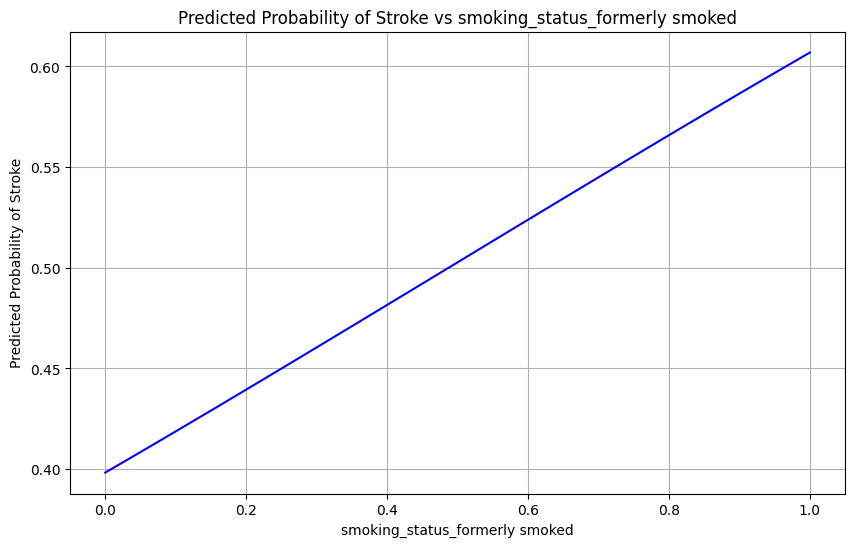

In [236]:
model = LogisticRegression()
model.fit(df_cleaned[['smoking_status_formerly smoked']], df_cleaned['stroke'])
# Predict the probability of stroke for a range of BMI values
smoking_status_formerly_smoked_values = np.linspace(df_cleaned['smoking_status_formerly smoked'].min(), df_cleaned['smoking_status_formerly smoked'].max(), 100).reshape(-1, 1)
predicted_probabilities = model.predict_proba(smoking_status_formerly_smoked_values)[:, 1]
# Plot the predicted probabilities against smoking_status_formerly smoked values
plt.figure(figsize=(10, 6))
plt.plot(smoking_status_smokes_values, predicted_probabilities, color='blue')
plt.title('Predicted Probability of Stroke vs smoking_status_formerly smoked')
plt.xlabel('smoking_status_formerly smoked')
plt.ylabel('Predicted Probability of Stroke')
plt.grid()
plt.show()

Huge difference there for people who formerly smoked (59% stroke risk) and those who didn't (37%).
Our best guess is that the data collected from those who are former smokers are people that have been smoking for a long time and then quit.
The rest may be different combinations from those who currently smoke (maybe data was collected from new smokers), those who never smoked, and others with unknown status.

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


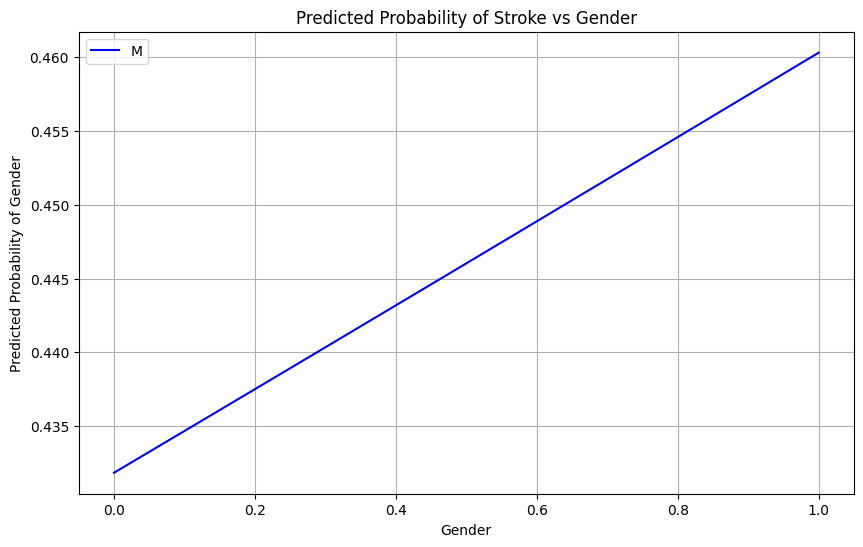

In [237]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_cleaned[['gender_Male']], df_cleaned['stroke'])
# Predict the probability of stroke for a range of BMI values
bmi_values = np.linspace(df_cleaned['gender_Male'].min(), df_cleaned['gender_Male'].max(), 100).reshape(-1, 1)
predicted_probabilities = model.predict_proba(bmi_values)[:, 1]
# Plot the predicted probabilities against BMI values
plt.figure(figsize=(10, 6))
plt.plot(bmi_values, predicted_probabilities, color='blue')
plt.title('Predicted Probability of Stroke vs Gender')
plt.xlabel('Gender')
plt.ylabel('Predicted Probability of Gender')
plt.legend("Male = 1, Female = 0")
plt.grid()
plt.show()


As we can see, difference in probability between stroke cases in males and females is a mere 4%. This feature does not contribute much to our prediction and can therefore be dropped.

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


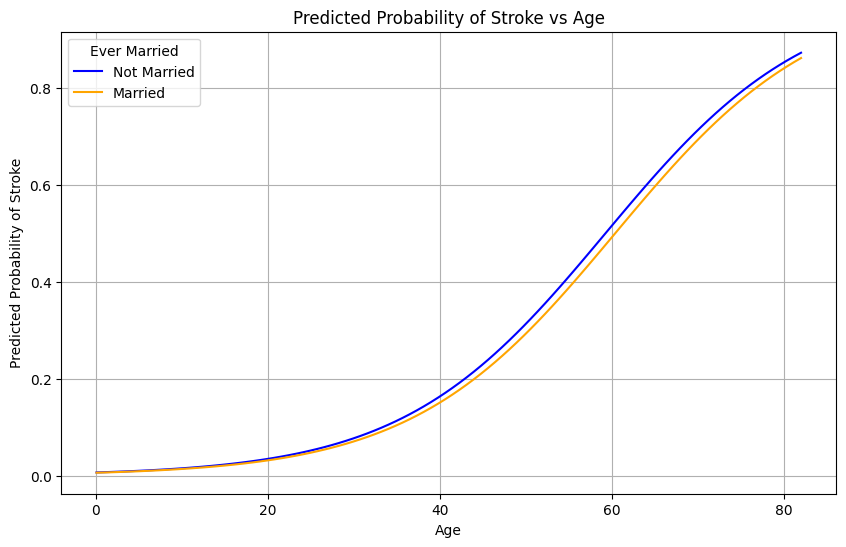

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = df_cleaned[['age', 'ever_married_Yes']]  # Features
y = df_cleaned['stroke']  # Target variable

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Generate a range of ages for prediction
age_range = np.linspace(df_cleaned['age'].min(), df_cleaned['age'].max(), 100)

# Create a DataFrame for predictions
probabilities = []
for married_status in [0, 1]:  # 0 for No, 1 for Yes
    age_married = np.column_stack((age_range, np.full_like(age_range, married_status)))
    predicted_probs = model.predict_proba(age_married)[:, 1]  # Probability of stroke (class 1)
    probabilities.append(predicted_probs)

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities[0], label='Not Married', color='blue')
plt.plot(age_range, probabilities[1], label='Married', color='orange')
plt.title('Predicted Probability of Stroke vs Age')
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Stroke')
plt.legend(title='Ever Married')
plt.grid()
plt.show()

 Notice here, Ever_Married feature doesn't matter as its most likely a factor of age, older people get more strokes due to their age, older people also have a much higher probability of having ever married. Correlation does not equal causation

Same conclusion can be drawn with the work_type, data show that work_type = Self_Employed has a higher probability of strokes than work_type = never_worked or children. This is because individuals that have worked before are most likely older people. Again, the high chance of stroke occurs thanks to the age feature and not something to do with their work status.
Keeping this feature would introduce redundancy as it is already represented by the age feature.

# **Features to be dropped:**

-ever_married_Yes  
-smoking_status_never smoked
-smoking_status_smokes
-smoking_status_Unknown
-work_type_Self-employed  
-Residence_type_Urban             
-work_type_Private           
-gender_Male                    
-work_type_Govt_job              
-gender_Other                      
-gender_Female                   
-work_type_Never_worked          
-Residence_type_Rural                     
-work_type_children              
-ever_married_No

In [239]:
#Drop the above features from the dataset
df_filtered = df_cleaned.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
df_filtered.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,stroke
0,67.0,0.0,1.0,228.69,36.600000,1.0,1.0
1,61.0,0.0,0.0,202.21,28.893237,0.0,1.0
2,80.0,0.0,1.0,105.92,32.500000,0.0,1.0
3,49.0,0.0,0.0,171.23,34.400000,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,0.0,1.0


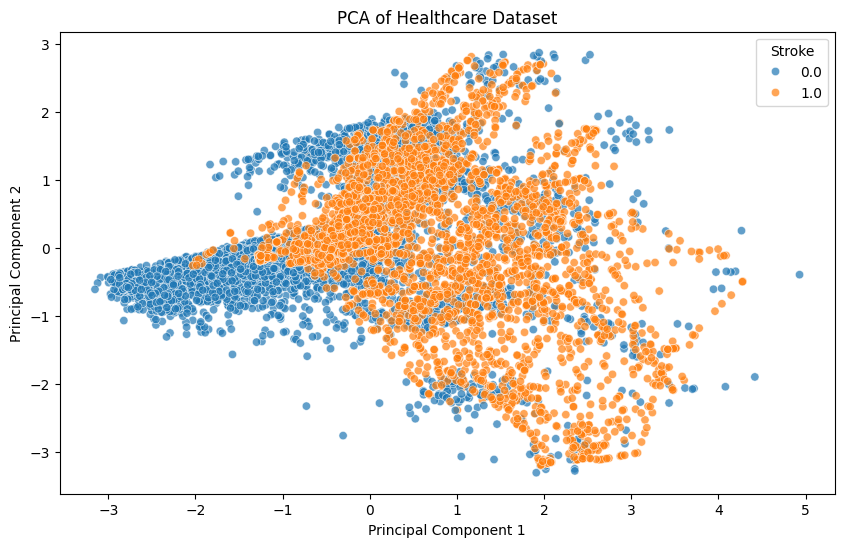

In [240]:
#Let's do some PCA to visualize the data in 2D
# we need to convert categorical variables to numerical ones
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered.drop(columns=['stroke']))
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['stroke'] = df_filtered['stroke'].values
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='stroke', data=pca_df, alpha=0.7)
plt.title('PCA of Healthcare Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke', loc='upper right')
plt.show()

In [241]:
print(pca.explained_variance_ratio_)

[0.31825353 0.17017597]


Using PCA is not useful here, classes are not sperated well as needed, we can use LDA for better visualization

C:\Users\ahmed\AppData\Local\Temp\ipykernel_9736\1692769423.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stroke', loc='upper right')


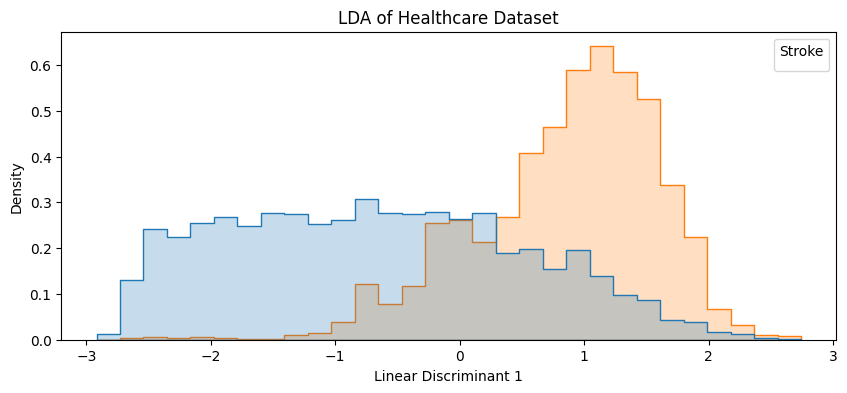

In [242]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Separate features and target
X = df_filtered.drop(columns=['stroke'])
y = df_filtered['stroke']

# Standardize the features
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LDA(n_components=1)  # Only 1 component for binary classification
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame with the LDA result
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
lda_df['stroke'] = y.values

# Plot the LDA result
plt.figure(figsize=(10, 4))
sns.histplot(data=lda_df, x='LD1', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('LDA of Healthcare Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Density')
plt.legend(title='Stroke', loc='upper right')
plt.show()


Good insight, LDA showed that there's hardly any separabilty between the two classes

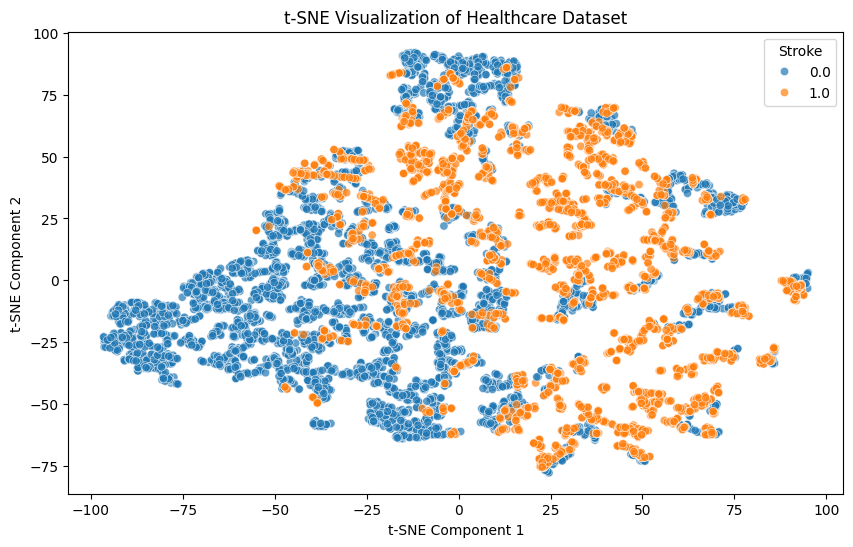

In [243]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Prepare the data
X = df_filtered.drop(columns=['stroke'])
y = df_filtered['stroke']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3. Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['stroke'] = y.values

# 4. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='stroke', data=tsne_df, alpha=0.7)
plt.title('t-SNE Visualization of Healthcare Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Stroke')
plt.show()


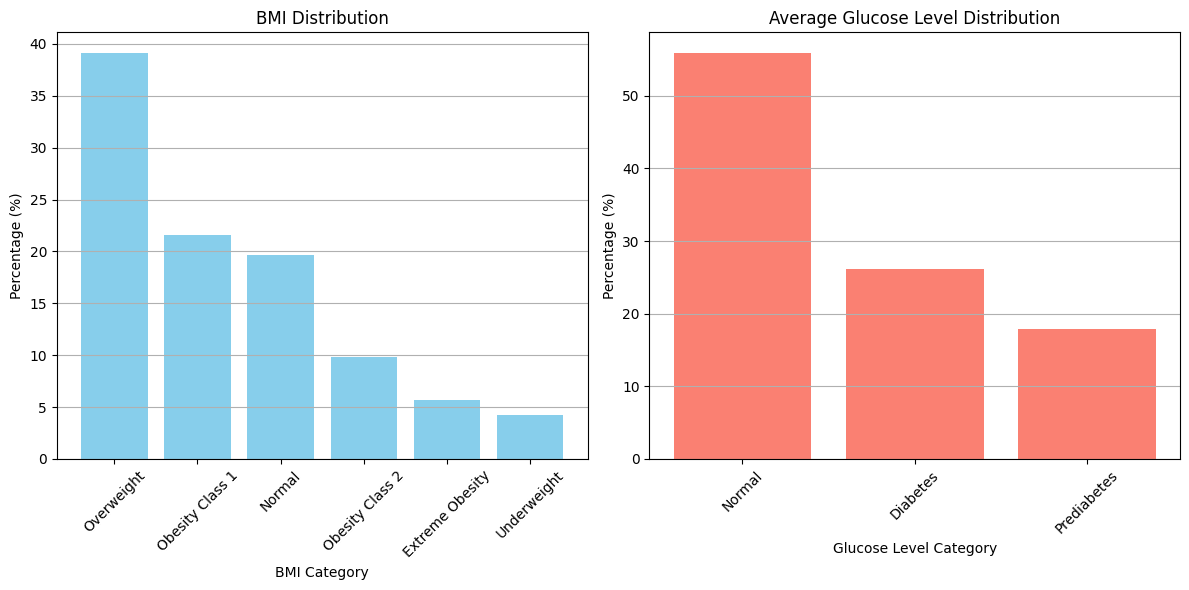

8419


In [244]:
# let's plot avg glucose level and bmi if they are realistic according medical standards

# Define BMI categories
bmi_categories = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels=['Underweight', 'Normal', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Extreme Obesity'])

# Calculate BMI category percentages
bmi_distribution = bmi_categories.value_counts(normalize=True) * 100

# Define glucose level categories
glucose_categories = pd.cut(df_cleaned['avg_glucose_level'], bins=[0, 100, 125, float('inf')],
                            labels=['Normal', 'Prediabetes', 'Diabetes'])

# Calculate glucose level category percentages
glucose_distribution = glucose_categories.value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bmi_distribution.index.astype(str), bmi_distribution.values, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.subplot(1, 2, 2)
plt.bar(glucose_distribution.index.astype(str), glucose_distribution.values, color='salmon')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(len(df_cleaned))

In [245]:
#describe bmi and avg glucose level columns
df_cleaned[['bmi', 'avg_glucose_level']].describe(percentiles=[.25, .5, .75, .95, .99])


,bmi,avg_glucose_level
count,8419.000000,8419.000000
mean,28.942255,113.191718
std,6.099293,49.621080
min,10.300000,55.120000
25%,25.106759,77.875000
50%,28.850586,94.770000
75%,32.021254,128.990000
95%,40.335977,217.665000
99%,45.198314,231.583419
max,49.400000,235.901563


# **Naive Bayes**

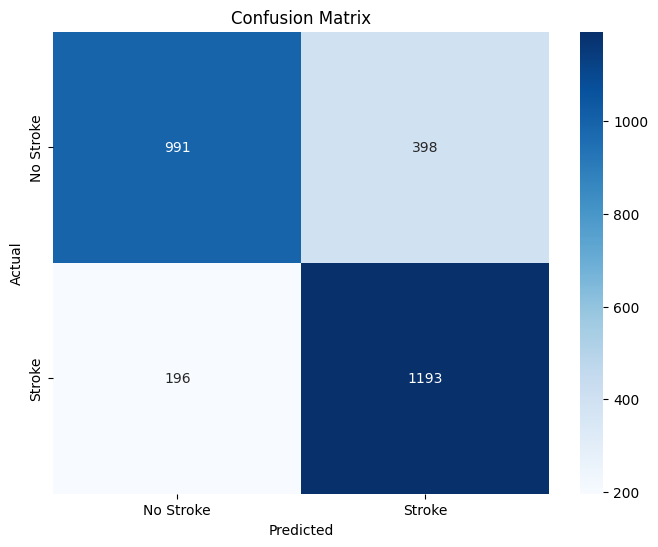


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77      1389
         1.0       0.75      0.86      0.80      1389

    accuracy                           0.79      2778
   macro avg       0.79      0.79      0.79      2778
weighted avg       0.79      0.79      0.79      2778


Accuracy Score:
0.7861771058315334


In [254]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target
X = df_filtered.drop(columns=['stroke'])  # Features
y = df_filtered['stroke']  # Target variable

X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=17, stratify=y_smote)

priors = [0.32, 0.68] 

nb_classifier = GaussianNB(priors=priors)

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# **SVM**


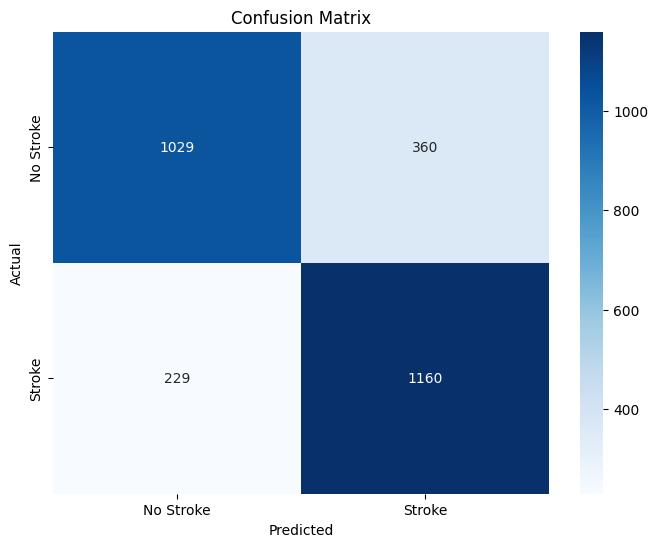


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78      1389
         1.0       0.76      0.84      0.80      1389

    accuracy                           0.79      2778
   macro avg       0.79      0.79      0.79      2778
weighted avg       0.79      0.79      0.79      2778


Accuracy Score:
0.7879769618430525


In [255]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))